## HLCV assignment 1
### Hacane Hechehouche

[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15]
[0.00088637 0.00158309 0.00271659 0.00447891 0.00709492 0.01079819
 0.01579003 0.02218417 0.02994549 0.03883721 0.04839414 0.05793831
 0.06664492 0.07365403 0.07820854 0.07978846 0.07820854 0.07365403
 0.06664492 0.05793831 0.04839414 0.03883721 0.02994549 0.02218417
 0.01579003 0.01079819 0.00709492 0.00447891 0.00271659 0.00158309
 0.00088637]


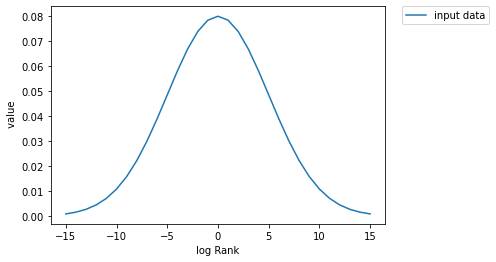

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def gauss(sigma):
    
    xx= list(range(-3*sigma, 3*sigma+1))
    G=[]
    x= np.linspace(-3*sigma, 3*sigma, 3*2*sigma+1,dtype='int') 
    G=np.exp(-(x*x)/(2*(sigma*sigma)))/(sigma*np.sqrt(2*np.pi))
    
     
    return G,x

g,x= gauss(5)

print(x)
print(g)

plt.plot(x,g, label="input data")  # log log plot of the input data
 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # the key of the graph
plt.ylabel(' value' )
plt.xlabel('log Rank')
plt.show()

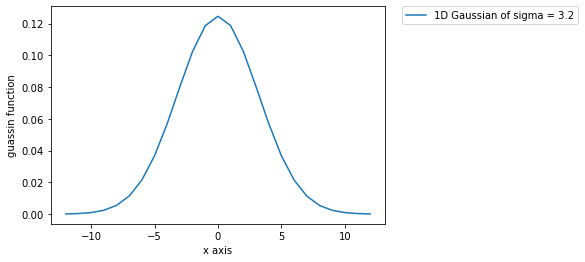

[1.10186151e-04 3.38735000e-04 9.44455636e-04 2.38831432e-03
 5.47759390e-03 1.13940104e-02 2.14957112e-02 3.67803160e-02
 5.70778392e-02 8.03355960e-02 1.02550303e-01 1.18728314e-01
 1.24669463e-01 1.18728314e-01 1.02550303e-01 8.03355960e-02
 5.70778392e-02 3.67803160e-02 2.14957112e-02 1.13940104e-02
 5.47759390e-03 2.38831432e-03 9.44455636e-04 3.38735000e-04
 1.10186151e-04]
[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]


In [14]:
import sys
sys.path.insert(0, './code/filter-Q1')
import gauss_module 
from importlib import reload
gauss_module = reload(gauss_module)
[G,x] = gauss_module.gauss(3.2)
print(G)
print(x)

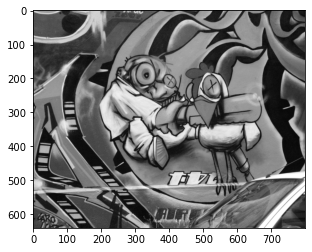

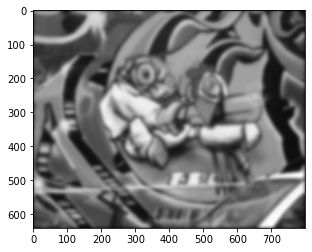

In [21]:
import scipy
import numpy as np
sigma=5
img= plt.imread("./code/filter-Q1/graf.png")
img=np.asarray(img)
greyImg =  np.dot(img[...,:3], [0.299, 0.587, 0.144])
kernel = np.outer(scipy.signal.windows.gaussian(3*2*sigma+1, sigma),scipy.signal.windows.gaussian(3*2*sigma+1, sigma))
blurredImg = scipy.signal.fftconvolve(greyImg, kernel, mode='same')
plt.figure()
plt.imshow(greyImg,cmap='gray')
plt.figure()
plt.imshow(blurredImg,cmap='gray')

In [20]:
from scipy import signal
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/filter-Q1')
from importlib import reload
import gauss_module 
gauss_module = reload(gauss_module)

img1= plt.imread("./code/filter-Q1/graf.png")
img2= plt.imread("./code/filter-Q1/kand.png")
img3= plt.imread("./code/filter-Q1/night.png")
sigma=4.0
outimage = gauss_module.gaussianfilter(img1,sigma)
 

NameError: name 'scipy' is not defined

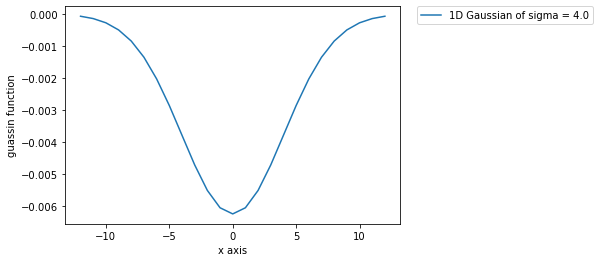

In [19]:
x= np.linspace(-3*math.ceil(sigma), 3*math.ceil(sigma), 3*2*math.ceil(sigma)+1,dtype='int') 
G=np.exp(-(x*x)/(2*(sigma*sigma)))/(-sigma*sigma*sigma*np.sqrt(2*np.pi))

plt.plot(x,G, label="1D Gaussian of sigma = " + str(sigma))  # log log plot of the input data
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # the key of the graph
plt.ylabel('guassin function' )
plt.xlabel('x axis')
plt.show()

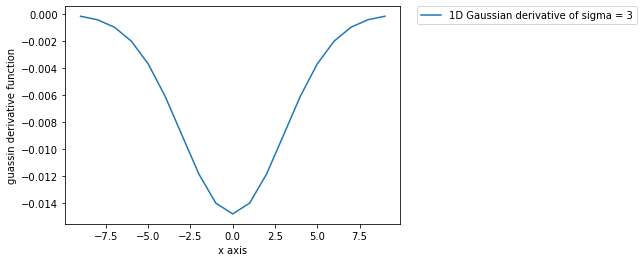

In [23]:
import sys
sys.path.insert(0, './code/filter-Q1')
import gauss_module 
from importlib import reload
gauss_module = reload(gauss_module)
[D,x] = gauss_module.gaussdx(3)

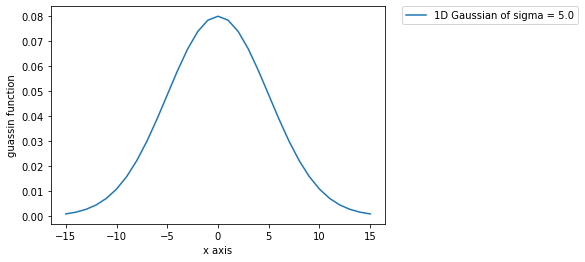

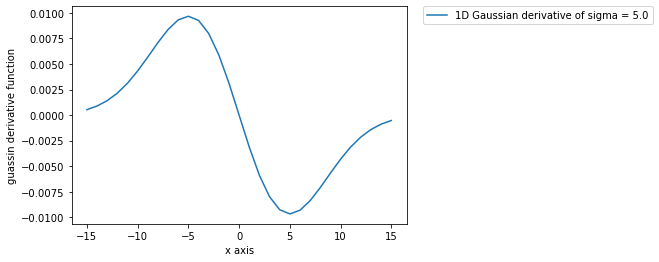

In [162]:
import sys
sys.path.insert(0, './code/filter-Q1')
import gauss_module 
from importlib import reload
gauss_module = reload(gauss_module)


imgImp = np.zeros((27,27))
imgImp[14,14] = 1.0
sigma = 5.0
G,x1 = gauss_module.gauss(sigma)
D,x2 = gauss_module.gaussdx(sigma)


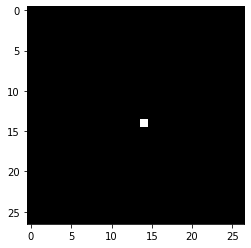

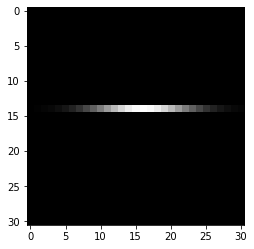

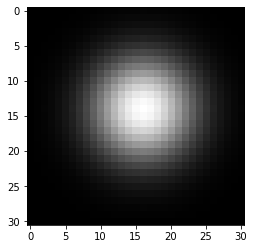

In [163]:
# first G, then GT 
plt.figure()
plt.imshow(imgImp,cmap='gray')
#imgImp_filtered = np.copy(imgImp)
new_size= max(D.size,imgImp[:,1].size)
imgImp_filtered=np.zeros((new_size,new_size))
for i in range(0,imgImp[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp[i,:], G, mode='same')
    #print(imgImp_filtered[:,i])
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp_filtered[:,i], G, mode='same')
    #print(imgImp_filtered[i,:])
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
 

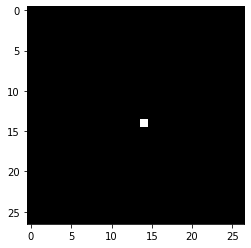

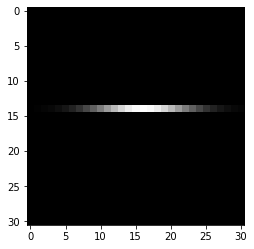

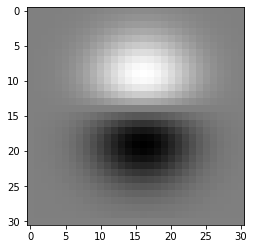

In [164]:
# first G, then DT 
plt.figure()
plt.imshow(imgImp,cmap='gray')
new_size= max(D.size,imgImp[:,1].size)
imgImp_filtered=np.zeros((new_size,new_size))
for i in range(0,imgImp[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp[i,:], G, mode='same')
    #print(imgImp_filtered[:,i])
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp_filtered[:,i], D, mode='same')
    #print(imgImp_filtered[i,:])
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
 

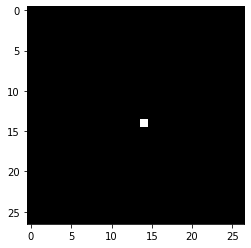

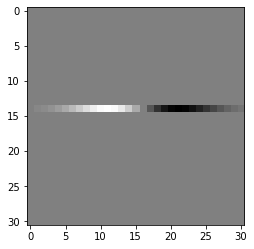

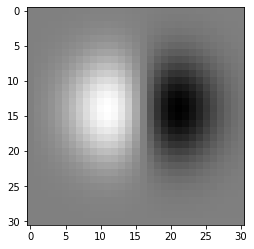

In [165]:
# first D, then GT 
plt.figure()
plt.imshow(imgImp,cmap='gray')
new_size= max(D.size,imgImp[:,1].size)
imgImp_filtered=np.zeros((new_size,new_size))
for i in range(0,imgImp[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp[i,:], D, mode='same')
  
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp_filtered[:,i], G, mode='same')
   
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
 

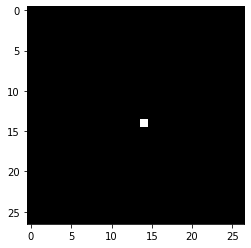

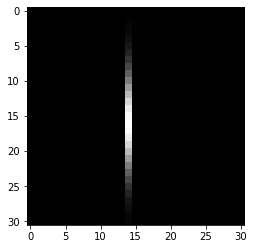

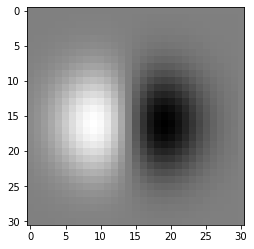

In [166]:
# first GT, then D
plt.figure()
plt.imshow(imgImp,cmap='gray')
new_size= max(D.size,imgImp[:,1].size)
imgImp_filtered=np.zeros((new_size,new_size))
for i in range(0,imgImp[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp[:,i], G, mode='same')

  
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp_filtered[i,:], D, mode='same')
   
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')

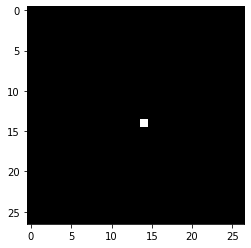

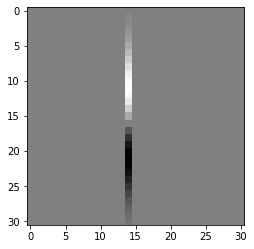

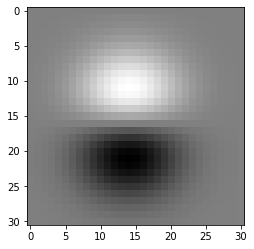

In [167]:
# first GT, then D
plt.figure()
plt.imshow(imgImp,cmap='gray')
new_size= max(D.size,imgImp[:,1].size)
imgImp_filtered=np.zeros((new_size,new_size))
for i in range(0,imgImp[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp[:,i], D, mode='same')

  
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp_filtered[i,:], G, mode='same')
   
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')

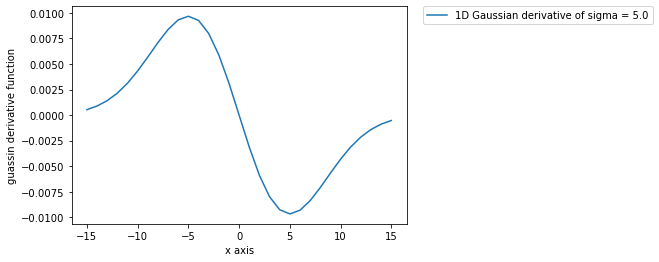

-0.08048653336620785


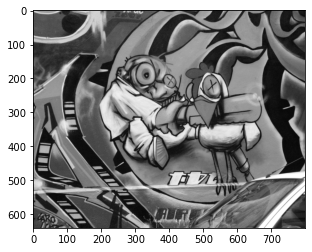

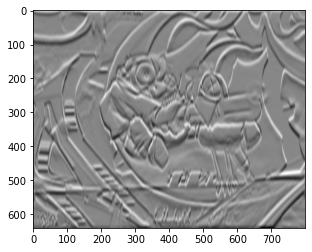

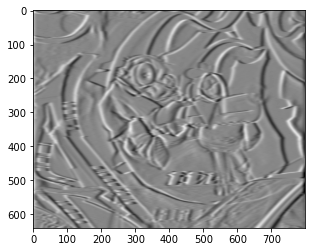

In [16]:
# gaussderiv function 
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/filter-Q1')
from importlib import reload
import gauss_module 
gauss_module = reload(gauss_module)

img1= plt.imread("./code/filter-Q1/graf.png")
img2= plt.imread("./code/filter-Q1/kand.png")
img3= plt.imread("./code/filter-Q1/night.png")
sigma=5.0
imgDx, imgDy = gauss_module.gaussderiv(img1,sigma)
print()

# Question 2

the pixel of the biggest value has= 233.62100173026323
the bin width is= 1.231578947368421


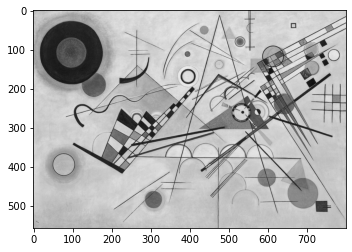

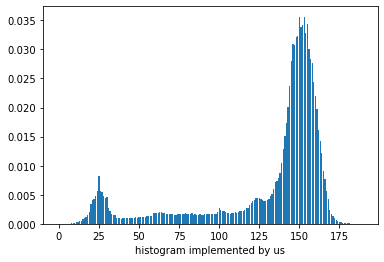

total sum of all histogram values is= 1.0


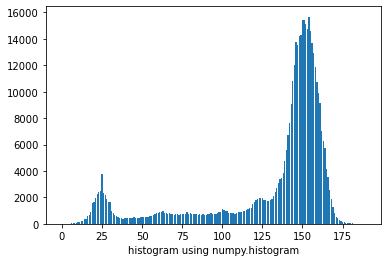

In [22]:
# Grey historgram calling the function
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/identification-Q234')
from importlib import reload
import histogram_module 
histogram_module = reload(histogram_module)

img1= plt.imread("./code/filter-Q1/graf.png")
img2= plt.imread("./code/filter-Q1/kand.png")
img3= plt.imread("./code/filter-Q1/night.png")
greyImg1 =  np.dot(img2[...,:3], [0.299, 0.587, 0.144])*255
greyImg2 =  np.dot(img2[...,:3], [0.299, 0.587, 0.144])*255
greyImg3 =  np.dot(img2[...,:3], [0.299, 0.587, 0.144])*255
print("the pixel of the biggest value has= " + str(np.max(greyImg2)))
#please give as image inpute either greyImg1 or greyImg2 or greyImg3
hists, bins = histogram_module.normalized_hist(greyImg2,num_bins=190)



nphist, npbins = np.histogram(greyImg2,190)


plt.figure()
plt.xlabel('histogram using numpy.histogram' )
fig = plt.bar(np.arange(len(nphist)), nphist)


the pixel of the biggest value has= 233.62100173026323
the bin width is= 1.231578947368421


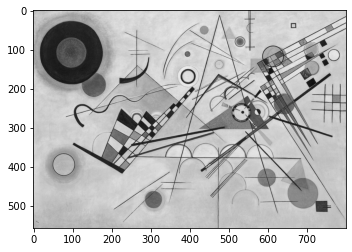

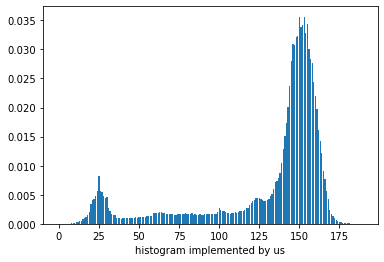

total sum of all histogram values is= 1.0
the bin width is= 1.3789473684210527


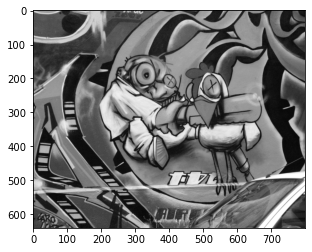

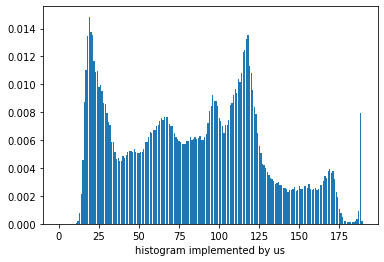

total sum of all histogram values is= 1.0


In [67]:
# Grey historgram calling the function
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/identification-Q234')
from importlib import reload
import histogram_module 
histogram_module = reload(histogram_module)

img1= plt.imread("./code/filter-Q1/graf.png")
img2= plt.imread("./code/filter-Q1/kand.png")
img3= plt.imread("./code/filter-Q1/night.png")
greyImg1 =  np.dot(img1[...,:3], [0.299, 0.587, 0.144])*255
greyImg2 =  np.dot(img2[...,:3], [0.299, 0.587, 0.144])*255
greyImg3 =  np.dot(img3[...,:3], [0.299, 0.587, 0.144])*255
print("the pixel of the biggest value has= " + str(np.max(greyImg2)))
#please give as image inpute either greyImg1 or greyImg2 or greyImg3
h1, bins = histogram_module.normalized_hist(greyImg2,num_bins=190)

h2, bins = histogram_module.normalized_hist(greyImg1,num_bins=190)

In [81]:
import sys
sys.path.insert(0, './code/identification-Q234')
from importlib import reload
import dist_module
dist_module = reload(dist_module)
print(dist_module.dist_chi2(h1,h2))
print(dist_module.dist_l2(h1,h2))
print(dist_module.dist_intersect(h1,h2))

12.111042490102994
0.13788625408828517
0.37096487530857286


190

In [80]:
import sys
sys.path.insert(0, 'C:/Users/hacan/Documents/HLCV/Github/HLCV/Assignment1/identification-Q234')
from importlib import reload
import dist_module_noor
dist_module_noor = reload(dist_module_noor)
print(dist_module_noor.dist_chi2(h1,h2))
print(dist_module_noor.dist_l2(h1,h2))
print(dist_module_noor.dist_intersect(h1,h2))

0.9810610494041251
0.8621137459117149
-188.62903512469143


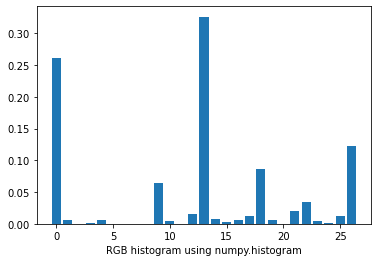

In [28]:
# RGB historgram calling the function
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/identification-Q234')
from importlib import reload
import histogram_module 
histogram_module = reload(histogram_module)

img1= 255*plt.imread("./code/filter-Q1/graf.png")
img2= 255*plt.imread("./code/filter-Q1/kand.png")
img3= 255*plt.imread("./code/filter-Q1/night.png")


num_bins=3
hists  = histogram_module.rgb_hist(img1,num_bins=num_bins)


plt.figure()
plt.xlabel('RGB histogram using numpy.histogram' )
fig = plt.bar(np.arange(len(hists)), hists)



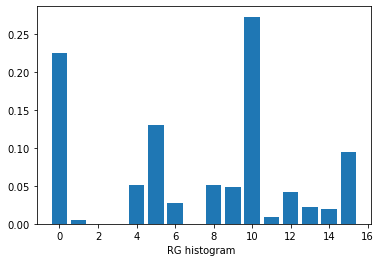

In [45]:
# RG historgram calling the function
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/identification-Q234')
from importlib import reload
import histogram_module 
histogram_module = reload(histogram_module)

img1= plt.imread("./code/filter-Q1/graf.png")
img2= plt.imread("./code/filter-Q1/kand.png")
img3= plt.imread("./code/filter-Q1/night.png")
 

hists = histogram_module.rg_hist(img1,num_bins=4)

 

plt.figure()
plt.xlabel('RG histogram  ' )
fig = plt.bar(np.arange(len(hists)), hists)

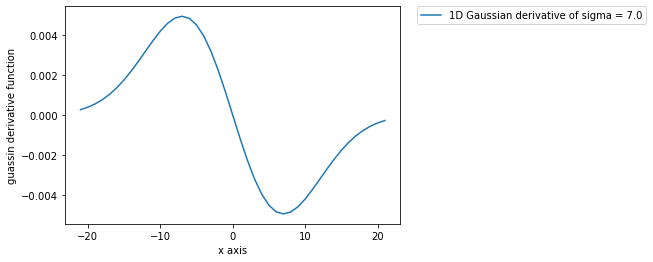

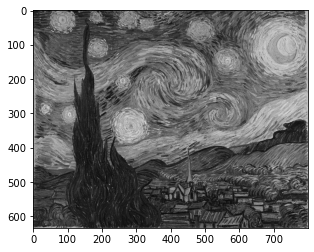

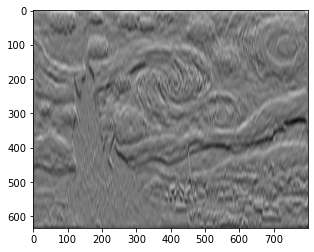

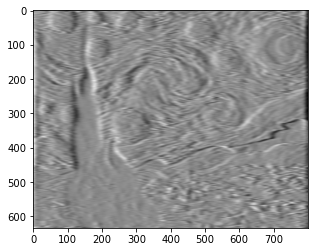

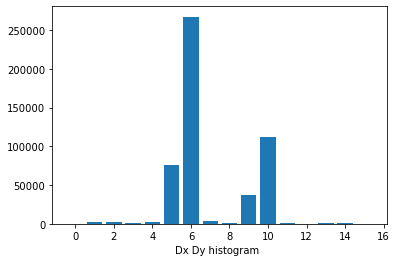

In [18]:
# DxDy histogram function 
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/identification-Q234')
from importlib import reload
import histogram_module 
histogram_module = reload(histogram_module)

img1= plt.imread("./code/filter-Q1/graf.png")
img2= plt.imread("./code/filter-Q1/kand.png")
img3= plt.imread("./code/filter-Q1/night.png")
greyImg =  np.dot(img3[...,:3], [0.299, 0.587, 0.144])
hists = histogram_module.dxdy_hist(greyImg,4)


plt.figure()
plt.xlabel('Dx Dy histogram  ' )
fig = plt.bar(np.arange(len(hists)), hists)